# Table of contents

### 01. Importing libraries
### 02. Importing data frames
### 03. Dropping name identifiers
### 04. Creating regional identifiers
### 05. Comparing spending habits in regions
### 06. Excluding low-activity customers
### 07. Customer profiling
#### Creating profile brackets based on age
#### Creating profile brackets based on income
#### Creating profile brackets based on number of dependants
### 08. Customer profiling visualization
### 09. Finding out the aggregates
### 10. Comparing regions and departments based on customer profiles
### 11. Additional visualizations

# 01. Importing libraries

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Importing data frames

In [5]:
# Creating a path

path = r'/Users/agne/Documents/Studies/Data Analysis/Study Materials/Python/Instacart Basket Analysis 2020 11'

In [7]:
cop = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers.pkl'))

# 03. Dropping name identifiers

In [9]:
cop.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,buying_frequency,frequency_flag,surname,sex,state,age,date_joined,#_of_dependants,fam_status,income
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,20.5,Non-Frequent Customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,prior,1,2,8,NaN,14084,2,0,...,20.5,Non-Frequent Customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,2539329,1,prior,1,2,8,NaN,12427,3,0,...,20.5,Non-Frequent Customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2539329,1,prior,1,2,8,NaN,26088,4,0,...,20.5,Non-Frequent Customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,2539329,1,prior,1,2,8,NaN,26405,5,0,...,20.5,Non-Frequent Customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [10]:
# Dropping the surname columns to avoid obvious identifiers.

cop.drop(columns = ['surname'], inplace = True)

In [11]:
cop.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,spending_flag,buying_frequency,frequency_flag,sex,state,age,date_joined,#_of_dependants,fam_status,income
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Low Spender,20.5,Non-Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,prior,1,2,8,NaN,14084,2,0,...,Low Spender,20.5,Non-Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423
2,2539329,1,prior,1,2,8,NaN,12427,3,0,...,Low Spender,20.5,Non-Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2539329,1,prior,1,2,8,NaN,26088,4,0,...,Low Spender,20.5,Non-Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423
4,2539329,1,prior,1,2,8,NaN,26405,5,0,...,Low Spender,20.5,Non-Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423


# 04. Creating regional identifiers

In [13]:
# Checking the values of the state column

cop['state'].value_counts()

state
Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mi

In [14]:
# Creating the region column

result = []

for value in cop['state']:
  if value == 'Maine':
    result.append('Northeast')
  elif value == 'New York':
    result.append('Northeast')
  elif value == 'New Hampshire':
    result.append('Northeast')
  elif value == 'Vermont':
    result.append('Northeast')
  elif value == 'Massachusetts':
    result.append('Northeast')
  elif value == 'Rhode Island':
    result.append('Northeast')
  elif value == 'Connecticut':
    result.append('Northeast')
  elif value == 'Pennsylvania':
    result.append('Northeast')
  elif value == 'New Jersey':
    result.append('Northeast')
  elif value == 'Wisconsin':
    result.append('Midwest')
  elif value == 'Michigan':
    result.append('Midwest')
  elif value == 'Illinois':
    result.append('Midwest')
  elif value == 'Indiana':
    result.append('Midwest')
  elif value == 'Ohio':
    result.append('Midwest')
  elif value == 'North Dakota':
    result.append('Midwest')
  elif value == 'South Dakota':
    result.append('Midwest')
  elif value == 'Nebraska':
    result.append('Midwest')
  elif value == 'Kansas':
    result.append('Midwest')
  elif value == 'Minnesota':
    result.append('Midwest')
  elif value == 'Iowa':
    result.append('Midwest')
  elif value == 'Missouri':
    result.append('Midwest')
  elif value == 'Delaware':
    result.append('South')
  elif value == 'Maryland':
    result.append('South')
  elif value == 'District of Columbia':
    result.append('South')
  elif value == 'Virginia':
    result.append('South')
  elif value == 'West Virginia':
    result.append('South')
  elif value == 'Georgia':
    result.append('South')
  elif value == 'North Carolina':
    result.append('South')
  elif value == 'South Carolina':
    result.append('South')
  elif value == 'Florida':
    result.append('South')
  elif value == 'Kentucky':
    result.append('South')
  elif value == 'Tennessee':
    result.append('South')
  elif value == 'Mississippi':
    result.append('South')
  elif value == 'Alabama':
    result.append('South')
  elif value == 'Texas':
    result.append('South')
  elif value == 'Louisiana':
    result.append('South')
  elif value == 'Arkansas':
    result.append('South')
  elif value == 'Oklahoma':
    result.append('South')
  elif value == 'Idaho':
    result.append('West')
  elif value == 'Montana':
    result.append('West')
  elif value == 'Wyoming':
    result.append('West')
  elif value == 'Nevada':
    result.append('West')
  elif value == 'Utah':
    result.append('West')
  elif value == 'Colorado':
    result.append('West')
  elif value == 'Arizona':
    result.append('West')
  elif value == 'New Mexico':
    result.append('West')
  elif value == 'Alaska':
    result.append('West')
  elif value == 'Washington':
    result.append('West')
  elif value == 'Oregon':
    result.append('West')
  elif value == 'California':
    result.append('West')
  elif value == 'Hawaii':
    result.append('West')
  else:
    result.append('Not indicated')

In [15]:
cop['region'] = result

In [16]:
cop['region'].value_counts()

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

# 05. Comparing spending habits in regions

In [18]:
# Creating a crosstab to compare the spending habits

crosstab = pd.crosstab(cop['region'], cop['spending_flag'], dropna = False)

In [19]:
crosstab

spending_flag,High Spender,Low Spender
region,,
Midwest,29265,7568060
Northeast,18642,5704094
South,40579,10751306
West,31223,8261690


It looks like the number of high spenders depend on the number of customers in general. If there are more customers in the region, there will be more high spenders there.

# 06. Excluding low-activity customers

In [22]:
# checking the data

cop.dtypes

order_id                    int64
user_id                    object
eval_set                   object
order_number                int64
orders_day_of_week          int64
order_hour_of_day           int64
days_since_prior_order    float64
product_id                  int64
add_to_cart_order           int64
reordered                   int64
product_name               object
aisle_id                    int64
department_id               int64
prices                    float64
price_range_loc            object
busiest_days               object
busiest_period_of_day      object
max_order                   int64
loyalty_flag               object
average_spending          float64
spending_flag              object
buying_frequency          float64
frequency_flag             object
sex                        object
state                      object
age                         int64
date_joined                object
#_of_dependants             int64
fam_status                 object
income        

In [23]:
# Setting up the conditions for the new activity column 

cop.loc[cop['max_order'] < 5, 'exclusion_flag'] = 'Low-activity customer'

In [24]:
cop.loc[cop['max_order'] >= 5, 'exclusion_flag'] = 'Normal customer'

In [25]:
# Checking if the new column is correct

cop['exclusion_flag'].value_counts()

exclusion_flag
Normal customer          30964564
Low-activity customer     1440295
Name: count, dtype: int64

There are more customers with normal activity (those who have made more than 5 orders) that those with low-activity (those who have shopped under 5 times).

In [27]:
# Checking results once more 

cop[['user_id', 'exclusion_flag', 'max_order']].head(60)

,user_id,exclusion_flag,max_order
0,1,Normal customer,10
1,1,Normal customer,10
2,1,Normal customer,10
3,1,Normal customer,10
4,1,Normal customer,10
5,1,Normal customer,10
6,1,Normal customer,10
7,1,Normal customer,10
8,1,Normal customer,10
9,1,Normal customer,10


In [28]:
# Separating the normal activity customers from the low activity customers

cop_active = cop.loc[cop['exclusion_flag']=='Normal customer']

In [29]:
# Checking the results 

cop_active.shape

(30964564, 32)

In [30]:
# Comparing the results with the original data

cop.shape

(32404859, 32)

In [31]:
# Exporting the file that has excluded the low-activity customers

cop_active.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'cop_activity_status.pkl'))

# 07. Customer profiling

In [33]:
# importing department names

dept = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)

In [34]:
dept

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [35]:
# Checking what family statuses are identified

cop['fam_status'].value_counts()

fam_status
married                             22756753
single                               5325691
divorced/widowed                     2771812
living with parents and siblings     1550603
Name: count, dtype: int64

In [36]:
# Checking the age range of customers

cop['age'].value_counts().sort_index()

age
18    500474
19    519606
20    502848
21    512527
22    513853
       ...  
77    502120
78    495311
79    529742
80    515246
81    509284
Name: count, Length: 64, dtype: int64

### Creating profile brackets based age

In [38]:
cop.loc[(cop['age'] <= 25), 'age_bracket'] = 'Young adult'

In [39]:
cop.loc[(cop['age'] > 25) & (cop['age'] < 41), 'age_bracket'] = 'Adult'

In [40]:
cop.loc[(cop['age'] > 40) & (cop['age'] < 65), 'age_bracket'] = 'Middle-aged adult'

In [41]:
cop.loc[(cop['age'] >= 65), 'age_bracket'] = 'Senior'

In [42]:
#Checking the results

cop['age_bracket'].value_counts(dropna = False)

age_bracket
Middle-aged adult    12159729
Senior                8575084
Adult                 7624857
Young adult           4045189
Name: count, dtype: int64

Middle-aged adults are the most common customer at Instacart. People aged 25 and under and the least common customer.

### Creating profile brackets based on income

In [45]:
cop.loc[(cop['income'] <= 57000), 'income_bracket'] = 'Low income'

In [46]:
cop.loc[(cop['income'] > 57000) & (cop['income'] <= 170000), 'income_bracket'] = 'Middle income'

In [47]:
cop.loc[(cop['income'] > 170000), 'income_bracket'] = 'High income'

In [48]:
#Checking the results

cop['income_bracket'].value_counts(dropna = False)

income_bracket
Middle income    26782850
Low income        5301564
High income        320445
Name: count, dtype: int64

People with middle income are the most common customers at Instacart. High earners are the least common.

### Creating profile brackets based on number of dependants

In [51]:
cop.loc[(cop['#_of_dependants'] == 0), 'dependant_bracket'] = 'No dependants'

In [144]:
cop.loc[(cop['#_of_dependants'] > 0), 'dependant_bracket'] = 'With dependants'

In [146]:
#Checking the results

cop['dependant_bracket'].value_counts(dropna = False)

dependant_bracket
With dependants    24307356
No dependants       8097503
Name: count, dtype: int64

Parents shop at Instacart more commonly than child-free people.

### Creating profile brackets based on number of dependants and familial status

In [89]:
cop.loc[(cop['#_of_dependants'] == 0) & (cop['fam_status'] == 'married'), 'family_dependants'] = 'Married no children'

In [91]:
cop.loc[(cop['#_of_dependants'] > 0) & (cop['fam_status'] == 'married'), 'family_dependants'] = 'Married with children'

In [93]:
cop.loc[(cop['#_of_dependants'] == 0) & (cop['fam_status'] == 'single'), 'family_dependants'] = 'Single no children'

In [95]:
cop.loc[(cop['#_of_dependants'] > 0) & (cop['fam_status'] == 'single'), 'family_dependants'] = 'Single with children'

In [97]:
cop.loc[(cop['#_of_dependants'] == 0) & (cop['fam_status'] == 'divorced/widowed'), 'family_dependants'] = 'Divorced/widowed no children'

In [99]:
cop.loc[(cop['#_of_dependants'] > 0) & (cop['fam_status'] == 'divorced/widowed'), 'family_dependants'] = 'Divorced/widowed with children'

In [101]:
cop.loc[(cop['#_of_dependants'] == 0) & (cop['fam_status'] == 'living with parents and siblings'), 'family_dependants'] = 'Multi-family household no children'

In [108]:
cop.loc[(cop['#_of_dependants'] > 0) & (cop['fam_status'] == 'living with parents and siblings'), 'family_dependants'] = 'Multi-family household with children'

In [110]:
#Checking the results

cop['family_dependants'].value_counts(dropna = False)

family_dependants
Married with children                   22756753
Single no children                       5325691
Divorced/widowed no children             2771812
Multi-family household with children     1550603
Name: count, dtype: int64

From this information, we can see that married shoppers always have dependants. They are most likely children. Shoppers who live with their parents might consider their parents their dependents, so we cannot assume they have children. Customers who are single or divorced, do not have children.

The most common customer is married with children.

# 08. Customer profile visualizaztion

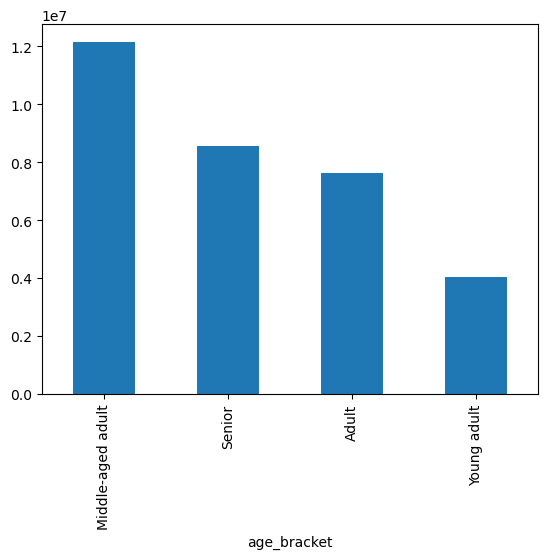

In [56]:
# Creating a bar chart for the age bracket

bar = cop['age_bracket'].value_counts().plot.bar()

In [57]:
# Saving the chart as an image 

bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_for_age_bracket.png'))

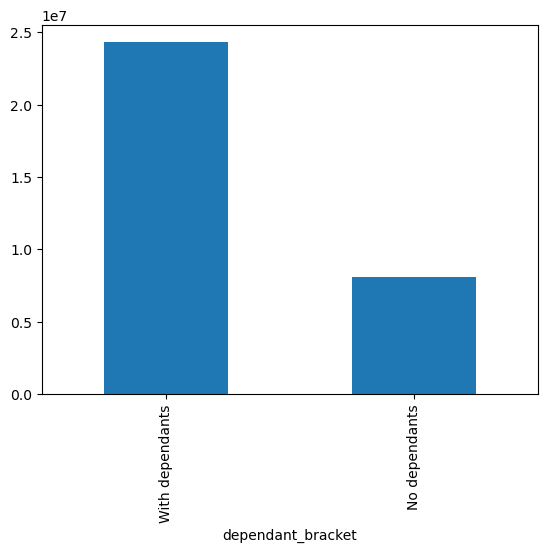

In [149]:
# Creating a bar chart for the dependants bracket

bar2 = cop['dependant_bracket'].value_counts().plot.bar()

In [151]:
# Saving the chart as an image 

bar2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_for_dependant_bracket.png'))

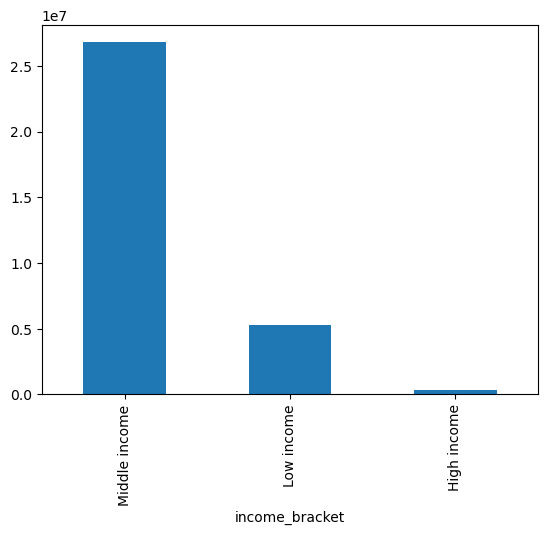

In [254]:
# Creating a bar chart for the income bracket

bar3 = cop['income_bracket'].value_counts().plot.bar()

In [264]:
# Saving the chart as an image 

bar3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_for_income_bracket.png'))

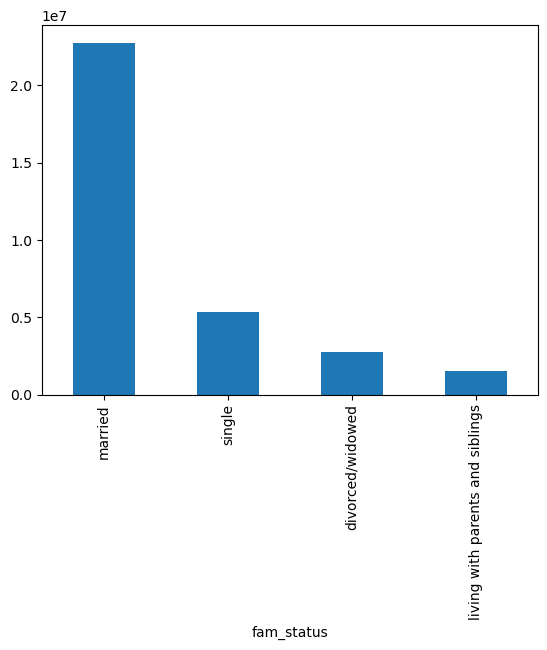

In [62]:
# Creating a bar chart for the familial status

bar4 = cop['fam_status'].value_counts().plot.bar()

Married people are the most common customers of Instacart.

In [114]:
# Saving the chart as an image 

bar4.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_for_fam_status.png'))

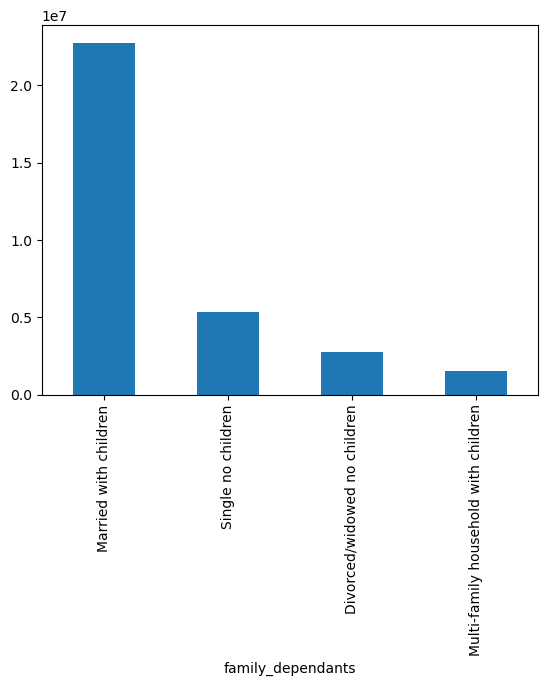

In [258]:
# Creating a bar chart for the column that combines the familial status and the number of dependants

bar5 = cop['family_dependants'].value_counts().plot.bar()

We can see that the two charts (the one that identifies familial status and the one that indicates both the familial status and the number of dependants) are identical. This means that single and divorced people are only child-free. Married people and those who live with their parents always have dependents.

In [262]:
# Saving the chart as an image 

bar5.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_for_family_and_dependants.png'))

# 09. Finding out the aggregates

### Buying frequency based on customer profile data

In [64]:
# Identifying how often do customers shop at Instacart based on their age

cop.groupby('age_bracket').agg({'buying_frequency': ['min', 'max', 'mean']})

buying_frequency                 
                               min   max       mean
age_bracket                                        
Adult                          0.0  30.0  10.402776
Middle-aged adult              0.0  30.0  10.424532
Senior                         0.0  30.0  10.362496
Young adult                    0.0  30.0  10.382574

Buying frequency variable identifies how many days users spend in between ordering products on Instacart. The smaller the number, the more frequent the purchases.

The average of how many days people spend between shppng at Instacart varies very minimally. Seniors are the ones that do it the most often, but their lead is only marginal (by 0.02 points).

In [66]:
# Identifying how often do customers shop at Instacart based on their income

cop.groupby('income_bracket').agg({'buying_frequency': ['min', 'max', 'mean']})

buying_frequency                 
                            min   max       mean
income_bracket                                  
High income                 0.0  30.0   9.324805
Low income                  0.0  30.0  10.943253
Middle income               0.0  30.0  10.302618

Looks like people with high income purchase from Instacart more frequently that other income groups.

In [153]:
# Identifying how often do customers shop at Instacart based on their dependants

cop.groupby('dependant_bracket').agg({'buying_frequency': ['min', 'max', 'mean']})

buying_frequency                 
                               min   max       mean
dependant_bracket                                  
No dependants                  0.0  30.0  10.367567
With dependants                0.0  30.0  10.407817

The difference in buying frequency is minimal, but the people with no dependants do shop a little more frequently.

In [130]:
# Identifying how often do customers shop at Instacart based on their familial status

cop.groupby('fam_status').agg({'buying_frequency': ['min', 'max', 'mean']})

buying_frequency                 
                                              min   max       mean
fam_status                                                        
divorced/widowed                              0.0  30.0  10.315293
living with parents and siblings              0.0  30.0  10.323661
married                                       0.0  30.0  10.413551
single                                        0.0  30.0  10.394774

The difference is again very minimal. However, the customers that shops the most frequently at Instacart are divorcees and widowers.

### Average stending based on the customer profile data

In [133]:
# Identifying the average amount people spend on Instacart groceries based on their age

cop.groupby('age_bracket').agg({'average_spending': ['min', 'max', 'mean']})

average_spending                     
                               min        max      mean
age_bracket                                            
Adult                          1.0  18.233333  7.786875
Middle-aged adult              1.0  20.114286  7.791230
Senior                         1.0  23.200000  7.796438
Young adult                    1.1  16.700000  7.785633

The averages of average spending are pretty much the same across the age groups. The group that has the highest average is seniors. The group that splurges the least is young adults.

In [138]:
# Identifying the average amount people spend on Instacart groceries based on their income

cop.groupby('income_bracket').agg({'average_spending': ['min', 'max', 'mean']})

average_spending                     
                            min        max      mean
income_bracket                                      
High income            4.465854  12.255556  7.784843
Low income             1.000000  14.423077  6.980153
Middle income          1.308333  23.200000  7.951438

Customers with middle income are the ones that Have the highest average spending as well as the highest average of average spending. Interestingly, the high earners are the ones that have spent the most as a minimum average purchase. This means that when the high earners purchase something, they tend to buy more expensive items.

In [155]:
# Identifying the average amount people spend on Instacart groceries based on their dependants

cop.groupby('dependant_bracket').agg({'average_spending': ['min', 'max', 'mean']})

average_spending                
                               min   max      mean
dependant_bracket                                 
No dependants                  1.0  20.0  7.789870
With dependants                1.0  23.2  7.791223

People with dependants tend to spend more on average. They also are the ones iwth the maximum average spending.

In [158]:
# Identifying the average amount people spend on Instacart groceries based on their familial status

cop.groupby('fam_status').agg({'average_spending': ['min', 'max', 'mean']})

average_spending                    
                                              min       max      mean
fam_status                                                           
divorced/widowed                              1.2  16.93125  7.800859
living with parents and siblings              1.3  14.90000  7.800621
married                                       1.0  23.20000  7.790582
single                                        1.0  20.00000  7.784150

# 10. Comparing regions and departments based on customer profiles

### Comparison of customer profile data within regions

In [177]:
# customer profiles within regions based on age

crosstab = pd.crosstab(cop['age_bracket'], cop['region'], dropna = False)

In [178]:
crosstab

region,Midwest,Northeast,South,West
age_bracket,,,,
Adult,1774944,1334736,2573379,1941798
Middle-aged adult,2892003,2122985,4005584,3139157
Senior,1990844,1553903,2836257,2194080
Young adult,939534,711112,1376665,1017878


The number of the customers in each region seem to really depend on the on the size of the age group in general. South is the biggest region so they have the most customers in every age group. Northeast is the smallest region, so they have the least amount of customers across the age groups.

In [199]:
# customer profiles within regions based on dependants

crosstab2 = pd.crosstab(cop['dependant_bracket'], cop['region'], dropna = False)

In [181]:
crosstab2

region,Midwest,Northeast,South,West
dependant_bracket,,,,
No dependants,1905200,1418301,2701659,2072343
With dependants,5692125,4304435,8090226,6220570


The same trend is apparent here -- the bigger the region, the more custoemrs are present there.

In [174]:
# customer profiles within regions based in income

crosstab3 = pd.crosstab(cop['income_bracket'], cop['region'], dropna = False)

In [185]:
crosstab3

region,Midwest,Northeast,South,West
income_bracket,,,,
High income,80984,52526,107065,79870
Low income,1218287,930223,1801879,1351175
Middle income,6298054,4739987,8882941,6861868


The same pattern is visible in these results as well. The bigger the region, teh more customers there. The bigegr the income group, the more people belong to it.

In [176]:
# customer profiles within regions based on familial status

crosstab4 = pd.crosstab(cop['fam_status'], cop['region'], dropna = False)

In [187]:
crosstab4

region,Midwest,Northeast,South,West
fam_status,,,,
divorced/widowed,646401,501059,920849,703503
living with parents and siblings,366517,268114,529584,386388
married,5325608,4036321,7560642,5834182
single,1258799,917242,1780810,1368840


Again, the more people in the region, the more customers there. The bigger the group size, the more prominent they are in the region.

### Comparison of customer profile data based on departments

In [194]:
# Adding department variable to cop dataframe

cop_dept = cop.merge(dept, on = 'department_id')

In [210]:
# customer profiles within departments based on age

crosstab5 = pd.crosstab(cop_dept['age_bracket'], cop_dept['department'], dropna = False)

In [213]:
crosstab5

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
age_bracket,,,,,,,,,,,,,,,,,,,,,
Adult,36832,99752,275016,624169,164289,8086,252733,1277757,247798,202621,...,172837,63940,164870,16204,8551,438699,104533,21953,2239412,683694
Middle-aged adult,57417,161594,441464,1016035,265386,12823,399397,2019917,395333,325262,...,277221,100502,265090,25848,13648,705896,169817,36182,3548512,1082397
Senior,39036,109445,309522,714832,183844,9242,282438,1426213,277618,228935,...,196935,70774,190114,18094,9425,496979,117405,26286,2513763,760515
Young adult,20411,53011,146426,333087,89514,4422,133490,674860,130500,109809,...,91673,34037,88853,8999,4667,233795,55817,13295,1177604,360944


In [214]:
# customer profiles within departments based on dependants

crosstab6 = pd.crosstab(cop_dept['dependant_bracket'], cop_dept['department'], dropna = False)

In [215]:
crosstab6

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
dependant_bracket,,,,,,,,,,,,,,,,,,,,,
No dependants,39118,106494,294405,674442,174577,8278,264838,1349362,265145,215262,...,180773,67713,174084,17088,9175,466757,112006,24583,2375445,720798
With dependants,114578,317308,878023,2013681,528456,26295,803220,4049385,786104,651365,...,557893,201540,534843,52057,27116,1408612,335566,73133,7103846,2166752


In [220]:
# customer profiles within departments based on income

crosstab7 = pd.crosstab(cop_dept['income_bracket'], cop_dept['department'], dropna = False)

In [222]:
crosstab7

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
income_bracket,,,,,,,,,,,,,,,,,,,,,
High income,7930,2599,15875,30497,8067,31,11461,56051,9255,8781,...,14173,2529,8030,448,583,20180,5011,2344,62603,28669
Low income,27044,50807,174443,553875,137041,6678,141493,813700,168546,114837,...,132715,37393,69516,10931,6018,275512,75575,14421,1375009,767689
Middle income,118722,370396,982110,2103751,557925,27864,915104,4528996,873448,743009,...,591778,229331,631381,57766,29690,1579677,366986,80951,8041679,2091192


High income people seem to buy very few bulk items.

In [224]:
# customer profiles within departments based on familial status

crosstab8 = pd.crosstab(cop_dept['fam_status'], cop_dept['department'], dropna = False)

In [226]:
crosstab8

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
fam_status,,,,,,,,,,,,,,,,,,,,,
divorced/widowed,12615,35326,100401,231025,59498,2765,89259,461911,90818,74220,...,61805,23060,60477,5493,3002,159981,38542,8409,812834,246796
living with parents and siblings,8896,20146,56142,124629,34731,1674,51190,260787,50415,41702,...,35226,13074,33981,3571,1911,90272,21312,5620,449628,137163
married,105682,297162,821881,1889052,493725,24621,752030,3788598,735689,609663,...,522667,188466,500862,48486,25205,1318340,314254,67513,6654218,2029589
single,26503,71168,194004,443417,115079,5513,175579,887451,174327,141042,...,118968,44653,113607,11595,6173,306776,73464,16174,1562611,474002


There seems to be no discernable pattern when it comes to departments and customers that purchase items from there. It all mostly depends on the size of the customer group.

In my opinion, the baby section should be the most revealing part of the departments in relation to customer profiles. One would expect that parents will have bought a significantly bigger number of baby-related products compared to childfree people. What's surprising is that both groups buy pretty much the same number of items from the baby department section. It really seems that the type of products bought depends more on the size of the customer profile and less on their buying tendencies depending on their family status, income, or age.

# 11. Additional visualizations

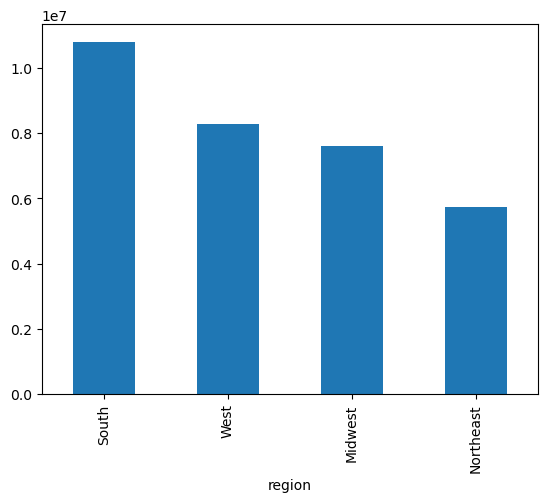

In [233]:
# Creating bar chart for regions

regions_bar = cop['region'].value_counts().plot.bar()

In [248]:
regions_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'regions_bar.png'))

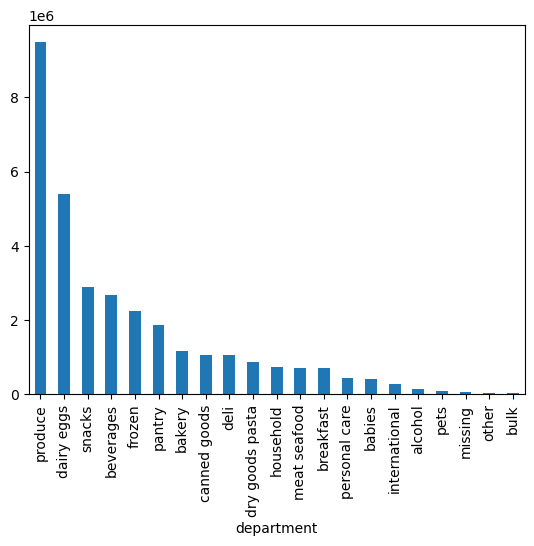

In [237]:
# Creating department frequency bar

departments_bar = cop_dept['department'].value_counts().plot.bar()

In [246]:
departments_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'department_frequency_bar.png'))

In [250]:
# Exporting the final data set file to pickle

cop.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'final_orders_products_customers.pkl'))

In [251]:
# Exporting the final data set file to pickle

cop_dept.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'departments_and_cop.pkl'))